In [1]:
import pandas as pd

zip_sea = pd.read_csv('inputs/zip_sea.csv')

In [2]:
print(zip_sea)

          Zip  Coastal/Inland  Pair     Date     Price  \
0     36576.0               0     1  2010-01       NaN   
1     36532.0               1     1  2010-01  278900.0   
2     36605.0               1     2  2010-01       NaN   
3     36606.0               0     2  2010-01       NaN   
4     99501.0               1     3  2010-01  256500.0   
...       ...             ...   ...      ...       ...   
7063  28467.0               0    36  2017-09  215900.0   
7064  23502.0               0    37  2017-09  185000.0   
7065  23518.0               1    37  2017-09  225000.0   
7066  23666.0               0    38  2017-09  189900.0   
7067  23661.0               1    38  2017-09  139900.0   

      TotalWeightedObservations  GMSL_noGIA  StdDevGMSL_noGIA  \
0                     336505.31         8.3             84.67   
1                     336505.31         8.3             84.67   
2                     336505.31         8.3             84.67   
3                     336505.31         8.3

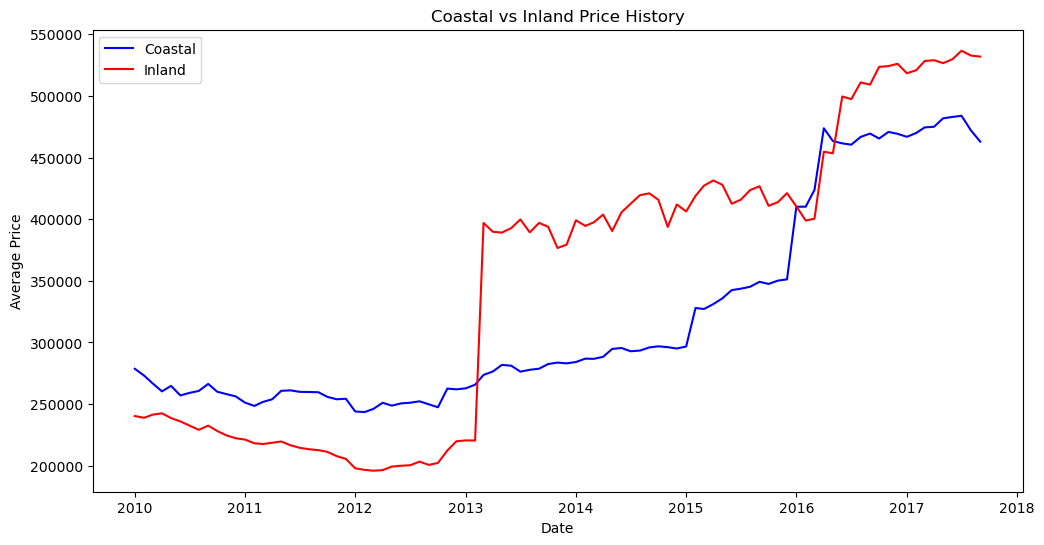

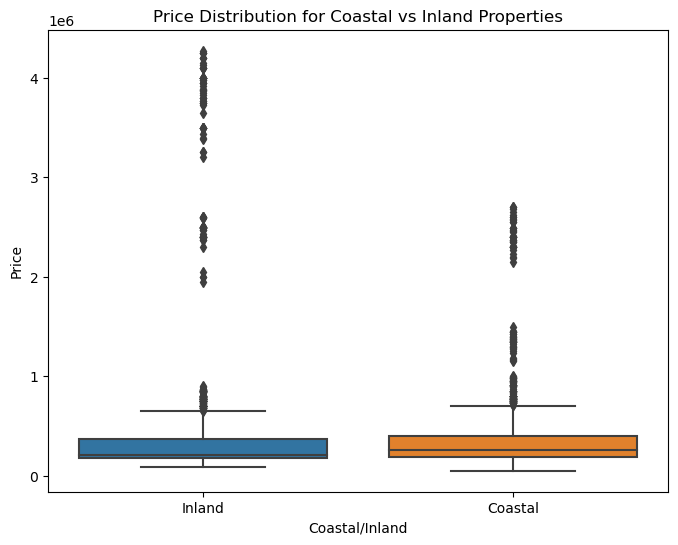

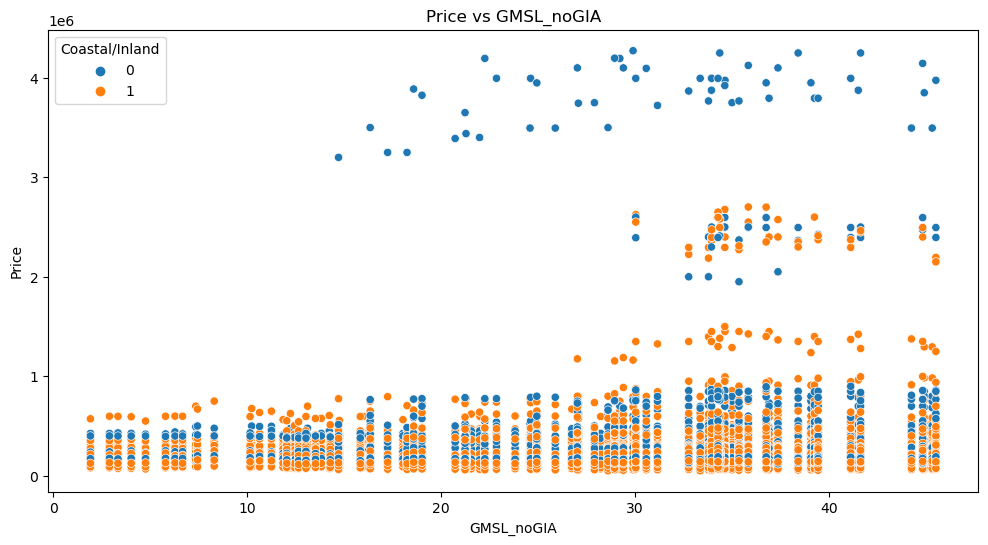

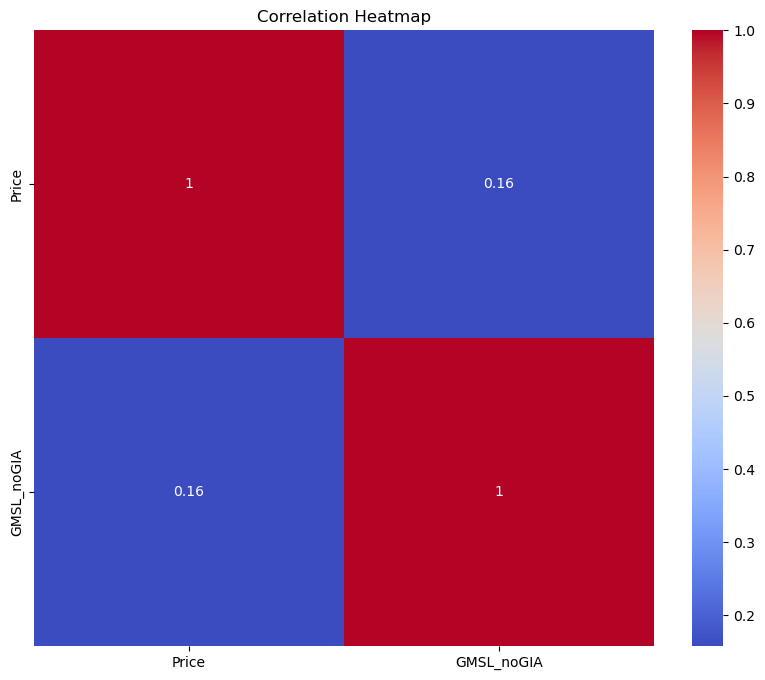

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1
zip_sea['Date'] = pd.to_datetime(zip_sea['Date'])

average_prices = zip_sea.groupby(['Date', 'Coastal/Inland'])['Price'].mean().reset_index()

coastal_prices = average_prices[average_prices['Coastal/Inland'] == 1]
inland_prices = average_prices[average_prices['Coastal/Inland'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(coastal_prices['Date'], coastal_prices['Price'], label='Coastal', color='blue')
plt.plot(inland_prices['Date'], inland_prices['Price'], label='Inland', color='red')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Coastal vs Inland Price History')
plt.legend()
plt.show()

#2
# Box plot of Price for Coastal vs Inland properties
plt.figure(figsize=(8, 6))
sns.boxplot(x="Coastal/Inland", y="Price", data=zip_sea)
plt.title("Price Distribution for Coastal vs Inland Properties")
plt.xticks(ticks=[0, 1], labels=["Inland", "Coastal"])
plt.show()

#3
# Scatter plot of Price vs GMSL_noGIA
plt.figure(figsize=(12, 6))
sns.scatterplot(x="GMSL_noGIA", y="Price", hue="Coastal/Inland", data=zip_sea)
plt.title("Price vs GMSL_noGIA")
plt.show()

#4
# Correlation heatmap for selected columns
selected_columns = zip_sea[["Price", "GMSL_noGIA"]]
corr_matrix = selected_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()